# Redes Neurais Artificiais 2020.1 -- Projeto Prático 3.4

**Disciplina**: Redes Neurais Artificiais 2020.1  
**Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
**Github**: http://github.com/elloa  

**Alunos**: Lucas da Silva Lima 1515080170, Rafael Barbosa de Carvalho 1315080337.
        

Levando em conta a base de dados **_Forest Cover Type_**, esta terceira parte do Projeto Prático 3 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Busca em Grade

Uma maneira padrão de escolher os parâmetros de um modelo de Machine Learning é por meio de uma busca em grade via força bruta. O algoritmo da busca em grade é dado como segue:

1. Escolha a métrica de desempenho que você deseja maximizar  
2. Escolha o algoritmo de Machine Learning (exemplo: redes neurais artificiais). Em seguida, defina os parâmetros ou hiperparâmetros deste tipo de modelo sobre os quais você dseja otimizar (número de épocas, taxa de aprendizado, etc.) e construa um array de valores a serem testados para cada parâmetro ou hiperparâmetro.  
3. Defina a grade de busca, a qual é dada como o produto cartesiano de cada parâmetro a ser testado. Por exemplo, para os arrays [50, 100, 1000] e [10, 15], tem-se que a grade é [(50,10), (50,15), (100,10), (100,15), (1000,10), (1000,15)].
4. Para cada combinação de parâmetros a serem otimizados, utilize o conjunto de treinamento para realizar uma validação cruzada (holdout ou k-fold) e calcule a métrica de avaliação no conjunto de teste (ou conjuntos de teste)
5. Escolha a combinação de parâmetros que maximizam a métrica de avaliação. Este é o modelo otimizado.

Por que esta abordagem funciona? Porque a busca em grade efetua uma pesquisa extensiva sobre as possíveis combinações de valores para cada um dos parâmetros a serem ajustados. Para cada combinação, ela estima a performance do modelo em dados novos. Por fim, o modelo com melhor métrica de desempenho é escolhido. Tem-se então que este modelo é o que melhor pode vir a generalizar mediante dados nunca antes vistos.

## Efetuando a Busca em Grade sobre Hiperparâmetros das Top-6 RNAs

Considerando a etapa anterior do projeto prático, foram identificadas pelo menos 6 melhores Redes Neurais para o problema da classificação multi-classe da cobertura florestal no conjunto de dados selecionado. Algumas destas redes possuem atributos categóricos como variáveis preditoras, enquanto outras possuem apenas os atributos numéricos como preditores.

A primeira etapa desta segunda parte do projeto consiste em trazer para este notebook estas seis arquiteturas, ressaltando:

1. Número de neurônios ocultos por camada  
2. Função de Ativação  
3. Utilização ou não de atributos categóricos   
4. Desempenho médio +- desvio padrão nos testes anteriores  
5. Número de repetições que a equipe conseguiu realizar para verificar os resultados  

Elabore uma busca em grade sobre estas arquiteturas que contemple variações nos hiperparâmetros a seguir, conforme documentação de [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

A. Solver  (Não usar o LBFGS, pois é mais adequado para datasets pequenos)  
B. Batch Size  
C. Learning Rate Init  
D. Paciência (n_iter_no_change)  
E. Épocas  

Nesta busca em grande, contemple a utilização do objeto [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

## Validação Cruzada k-fold

Na elaboração da busca em grid, vamos avaliar os modelos propostos segundo uma estratégia de validação cruzada ainda não explorada até o momento: a validação cruzada k-fold. Segundo a mesma, o conjunto de dados é particionado em k partes: a cada iteração, separa-se uma das partes para teste e o modelo é treinado com as k-1 partes remanescentes. Valores sugestivos de k na literatura são k = 3, 5 ou 10, pois o custo computacional desta validação dos modelos é alto. A métrica de desempenho é resultante da média dos desempenhos nas k iterações. A figura a seguir ilustra a ideia desta avaliação

<img src = "https://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png" width=600></img>


Considerando a métrica de desempenho F1-Score, considere a validação cruzada 5-fold para aferir os resultados da busca em grande anterior.

Na parte 3 deste projeto, obtivemos 8-tops redes neurais com os maiores valores de acurácia e f-score, 
para este problema iremos selecionar as 6-tops em relação ao F-Score. As quais na estratégia proposta utilizaremos as redes, 3, 4 e 7, e na regra da Pirâmide Geométrica, utilizaremos as Redes 20, 21 e 22, pois são essas que possuem os maiores valores de F-Score, no qual tentaremos aumentar. No dataset, não utilizaremos os atributos categóricos para esta parte do projeto.

#### Rede 3
    Média F-Score = 0.6451
    Desvio Padrão F-Score = 0.0103

### Rede 4
    Média F-Score = 0.6749
    Desvio Padrão F-Score = 0.0101

#### Rede 7 treinada 
    Média F-Score = 0.6554
    Desvio Padrão F-Score = 0.0100

#### Rede 20
    Média F-Score = 0.6650
    Desvio Padrão F-Score = 0.0149


#### Rede 21
    Média F-Score = 0.6688
    Desvio Padrão F-Score = 0.0130


#### Rede 22
    Média F-Score = 0.6751
    Desvio Padrão F-Score = 0.0140

In [1]:
## Reservado para a importação de bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

In [2]:
csvFileComplete = pd.read_csv("data/covtype.csv")
df_complete = pd.DataFrame(csvFileComplete)

# Eliminando colunas relativas à atributos categóricos
columns = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3','Wilderness_Area4']
for i in range(1,41):
    soil = 'Soil_Type'+str(i)
    columns.append(soil)
    soil = '' 


df_complete.drop(columns, axis='columns', inplace=True)
array_complete = df_complete.to_numpy()
x_complete = array_complete[...,0:array_complete.shape[1]-1] 
y_complete = array_complete[...,array_complete.shape[1]-1]

scaler = StandardScaler()
x_complete_scaler = scaler.fit_transform(x_complete)

In [3]:
parameters = {'hidden_layer_sizes': [(15), (15,15), (10,15), (24), (25), (26)],
              'activation': ["logistic", "tanh", "relu"],
              'random_state': [1],
              'solver': ['adam', 'sgd'], 
              'batch_size': ["auto"], 
              'learning_rate_init': [0.01], 
              'n_iter_no_change': [10], 
              'max_iter': [100, 200, 300]}

Em relação a parte 3 do projeto, esses foram os valores que utilizamos, alguns mantivemos o padrão para todos, sem alterações, como o batch_size, o learning_rate_init e o n_iter_no_change, porém modificamos, principalmente na estratégia que propusemos o solver e a quantidade de épocas.

In [4]:
grid = GridSearchCV(MLPClassifier(), param_grid=parameters, cv=5, scoring='f1_macro', n_jobs=-1, verbose=10)
grid_result = grid.fit(x_complete_scaler,y_complete)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 39.2min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 48.2min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 60.4min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 66.0min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 75.6min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 84.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 93.6min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 10

In [21]:
best_model = grid.best_estimator_ # melhor modelo
best_score = grid.best_score_ # melhor f-score desse melhor modelo
best_params = grid.best_params_ # parametros desse melhor modelo

## Identificando a melhor solução

Como resultado da busca em grande com validação cruzada 5-fold, identifique o modelo otimizado com melhor desempenho para o problema. Apresente claramente este modelo, seus parâmetros, hiperparâmetros otimizados e resultados para cada um dos folds avaliados. Esta é a melhor solução identificada em decorrência deste projeto

In [22]:
print(f"Melhor modelo: {best_model} \n")
print(f"FScore do melhor modelo: {best_score} \n")
print(f"Parâmetros do melhor modelo: {best_params}\n")

Melhor modelo: MLPClassifier(activation='tanh', hidden_layer_sizes=26, learning_rate_init=0.01,
              random_state=1, solver='sgd') 

FScore do melhor modelo: 0.45050174729577713 

Parâmetros do melhor modelo: {'activation': 'tanh', 'batch_size': 'auto', 'hidden_layer_sizes': 26, 'learning_rate_init': 0.01, 'max_iter': 200, 'n_iter_no_change': 10, 'random_state': 1, 'solver': 'sgd'}



In [7]:
fold_results = cross_val_score(best_model, x_complete, y_complete, cv=5)

In [16]:
print(f"Resultado para os 5 folds: {fold_results}")

Resultado para os 5 folds: [0.48759498 0.48759498 0.48759918 0.48760779 0.36460646]


## Empacotando a solução

Suponha que você deve entregar este classificador ao órgão responsável por administrar o Roosevelt National Park. Para tanto, você deve fazer uma preparação do mesmo para utilização neste cenário. Uma vez que já identificou os melhores parâmetros e hiperparâmetros, o passo remanescente consiste em treinar o modelo com estes valores e todos os dados disponíveis, salvando o conjunto de pesos do modelo ao final para entrega ao cliente. Assim, finalize o projeto prático realizando tais passos.

1. Consulte a documentação a seguir:
https://scikit-learn.org/stable/modules/model_persistence.html  
2. Treine o modelo com todos os dados  
3. Salve o modelo em disco  
4. Construa uma rotina que recupere o modelo em disco  
5. Mostre que a rotina é funcional, fazendo previsões com todos os elementos do dataset e exibindo uma matriz de confusão das mesmas

In [9]:
best_estimator = grid.best_estimator_
best_estimator.fit(x_complete, y_complete)

MLPClassifier(activation='tanh', hidden_layer_sizes=26, learning_rate_init=0.01,
              random_state=1, solver='sgd')

In [10]:
from joblib  import dump, load

In [11]:
dump(best_estimator, 'estimator.joblib')

['estimator.joblib']

In [12]:
def load_estimator(estimator_name):
    return load(estimator_name)

In [13]:
estimator_from_disk = load_estimator('estimator.joblib')

In [14]:
y_predict = estimator_from_disk.predict(x_complete)

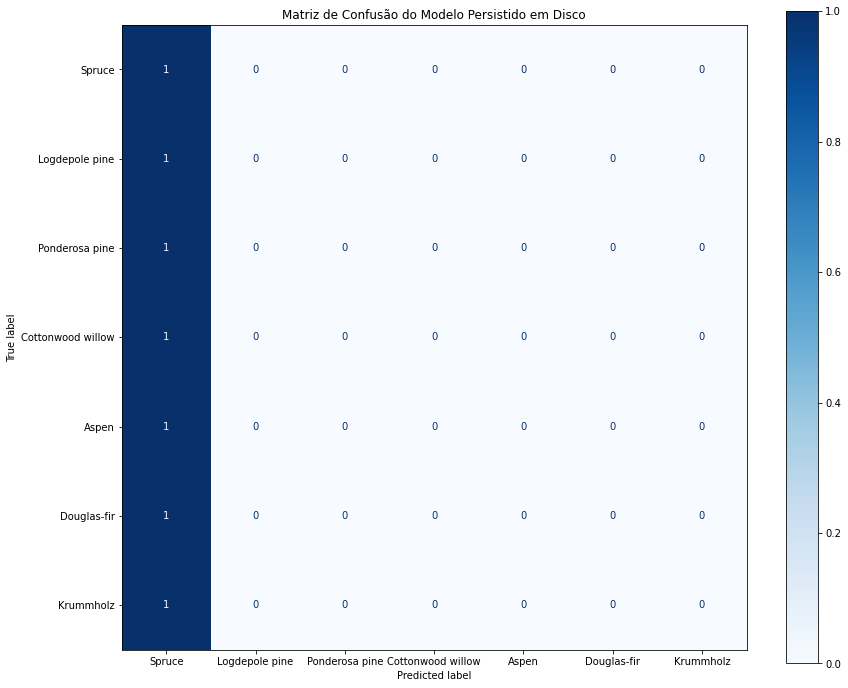

In [20]:
fig, ax = plt.subplots(figsize=(14,12))
plot_confusion_matrix(estimator_from_disk, x_complete, y_complete,
                           display_labels=["Spruce","Logdepole pine","Ponderosa pine","Cottonwood willow","Aspen","Douglas-fir","Krummholz"], 
                           cmap=plt.cm.Blues,
                           normalize="true", ax=ax)
plt.title("Matriz de Confusão do Modelo Persistido em Disco")
plt.show()